#Загрузка и очистка первоначальных данных

https://drive.google.com/file/d/1LOCiayUBeGNM1P98FVDVbMtT8pH8Pa8o/view?usp=share_link - df_merge_labllled.csv

https://drive.google.com/file/d/1wMgW_GP0COpzzhm1QOKwKuN2b8lsI9Z9/view?usp=share_link - df_merge_labelled_enriched - df_merge_labelled_enriched

In [1]:
! gdown -- 1LOCiayUBeGNM1P98FVDVbMtT8pH8Pa8o

! gdown -- 1wMgW_GP0COpzzhm1QOKwKuN2b8lsI9Z9

zsh:1: command not found: gdown
zsh:1: command not found: gdown


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from pymystem3 import Mystem
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
_stopwords = stopwords.words('russian')

objects = pd.read_csv("df_merge_labelled.csv")
objects.drop(columns='comment', inplace=True)
objects = objects[objects.connectedness != 0]

[nltk_data] Downloading package stopwords to /Users/olko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def clean(data, cols_drop, pattern, replacement, lemmatize=True):
    
    if cols_drop != None:
        data = data.drop(columns=cols_drop)
    data = data.fillna('')
    data['text'] = data['name'] + " " + data['author'] + " " + data['technologies']
    data['text'] = data['text'].astype('str')
    data['text'] = data['text'].apply(lambda x: x.lower())
    data['text'] = data.text.str.replace(pattern, replacement)
    if lemmatize:
        m = Mystem()
        data['text'] = data.text.apply(lambda x: ''.join(m.lemmatize(x)).rstrip())
    
    return data

In [4]:
objects_cleaned = clean(data=objects, cols_drop=['regNumber', 'invNumber', 'gikNumber', 'type', 'nativeId',
                                                 'description', 'image'],
                        pattern='[\d+\\.\\,\\!\\?\\-\"\'\\:\\;\\`\\)\\(\\{\\}\\[\\]x+v+i+\\«\\»\\—\\/\\\\\n]', replacement='')

/var/folders/tk/zw8myvyj39z_q3c256dtl3d00000gn/T/ipykernel_32167/3149391528.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data.text.str.replace(pattern, replacement)


In [11]:
objects_cleaned

,id,name,author,technologies,connectedness,text
0,5c3e1b7293fa687ca4c17408,Картина. Вид на Адмиралтейство.,неизвестный художник по рис. М.И. Махаева,"живопись, холст, масло",2,картина вид на адмиралтейство неизвестный худо...
2,5c3e09b693fa687ca4c0d1af,Проспект по реке Фонтанке от Грота и Запасного...,"Валериани, Джузеппе (1708 - 1762), по рисунку ...","масло, холст",2,проспект по река фонтанка от грот и запасной д...
3,6011e347b27c324dbb8a3d23,Вид Невской перспективы у Аничкова дворца.,"Неизвестный художник, варьированная копия гра...",холст. масло,2,вид невский перспектива у аничкова дворец неиз...
4,6011e347b27c324dbb8a3d39,Здание Двенадцати коллегий на Васильевском ост...,"Неизвестный художник, варьированная копия с гр...",холст. масло,2,здание двенадцать коллегия на васильевский ост...
5,6227c720cff1801b8a9a2085,Летний дворец,Неизвестный художник ХVIII века (круга Махаева),"холст, масло",3,летний дворец неизвестный художник х век круг...
...,...,...,...,...,...,...
1339,5c3e174193fa687ca48548e6,Фотография. Фрагмент гравюры «Вид города Свияж...,,"фотобумага, картон, фотопечать",5,фотография фрагмент гравюра вид город свияжск ...
1340,5c3e174193fa687ca48548e8,Фотография. Фрагмент гравюры «Вид города Свияж...,,"фотобумага, картон, фотопечать",5,фотография фрагмент гравюра вид город свияжск ...
1341,5c3e174193fa687ca4854957,Фотография. Гравюра «Вид города Свияжска при в...,,"фотобумага, картон, фотопечать",5,фотография гравюра вид город свияжск при водоп...
1342,5c3e195093fa687ca4a2cff6,Фототипия. Кусково. Грот и перспектива с гравю...,Бондаренко И. Е. (Редактор),"бумага, фототипия",5,фототипия кусково грот и перспектива с гравюра...


# Функция векторизации

In [6]:
def vectorize(data, _type, sw=None):
    
    if _type == 'count':
        vectorizer = CountVectorizer(stop_words=sw)
        X = vectorizer.fit_transform(data['text'])
    if _type == 'tfidf':
        vectorizer = TfidfVectorizer(stop_words=sw)
        X = vectorizer.fit_transform(data['text'])
        
    return X, vectorizer.get_feature_names_out()

#Расширенные данные

In [21]:
#гружу расширенные данные

new_data = pd.read_csv("df_merge_labelled_enriched - df_merge_labelled_enriched.csv")

In [8]:
# они без названия колонок, поэтому назовем их
new_data.columns =['id', 'name', 'author', 'regNumber', 'invNumber', 'gikNumber', 'type', 'statusId', 'nativeId', 'date', 'new_type', 'description', 'technologies', 'image', 'connectedness']

In [10]:
new_data

,id,name,author,regNumber,invNumber,gikNumber,type,statusId,nativeId,date,new_type,description,technologies,image,connectedness
0,5c3e0ff893fa687ca41a64ad,Екатерининский дворец,Махаев Н. М.,3640287,ЕД-865-X,ЦС КП-19894,0,6,475975,1827,живопись,Изображен Екатерининский дворец со стороны сев...,"масло, холст",http://goskatalog.ru/muzfo-imaginator/rest/ima...,0.0
1,5c3e190393fa687ca49e7935,Портрет. И. И. Махаев в роли. Неустановленный ...,[Ларин Юрий Николаевич],9696309,Ж 1548,ГЦТМ КП 331864,0,6,9817591,1985 г. 1985,живопись,Изображен в повороте корпусом вправо молодой т...,"холст, масло",http://goskatalog.ru/muzfo-imaginator/rest/ima...,0.0
2,5c3e190493fa687ca49e7fb8,Портрет. Махаев И. И.,Гусев Владимир Сергеевич,9696756,Ж 1549,ГЦТМ КП 331865,0,6,9817991,1980-е гг. 1980-1989,живопись,На фоне стены изображен поколенно корпусом в ф...,"Холст, масло",http://goskatalog.ru/muzfo-imaginator/rest/ima...,0.0
3,5c3e196393fa687ca4a40b12,Портрет. И. И. Махаев,Лукьянов Виктор Евгеньевич,9858879,NaN,ГЦТМ КП 332002,0,6,9976566,2008 г. 2008,живопись,На сиреневом фоне изображен корпусом в профиль...,"холст, масло",http://goskatalog.ru/muzfo-imaginator/rest/ima...,0.0
4,5c3e1ae593fa687ca4b994a1,Эскиз мужских костюмов. Жители Антоновки. Фина...,Комолова Валентина Александровна,10388211,ГКС 3458,ГЦТМ КП 323956,0,6,10498398,1991 г. 1991,графика,NaN,"Бумага коричневая на бумаге, графитный каранда...",http://goskatalog.ru/muzfo-imaginator/rest/ima...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,5c3e174193fa687ca48548e8,Фотография. Фрагмент гравюры «Вид города Свияж...,NaN,8953997,NaN,ОГС КП-198,0,6,9069595,XX век,фотографии и негативы,NaN,"фотобумага, картон, фотопечать",http://goskatalog.ru/muzfo-imaginator/rest/ima...,5.0
1720,5c3e174193fa687ca4854957,Фотография. Гравюра «Вид города Свияжска при в...,NaN,8953946,NaN,ОГС КП-197,0,6,9069648,XX век,фотографии и негативы,NaN,"фотобумага, картон, фотопечать",http://goskatalog.ru/muzfo-imaginator/rest/ima...,5.0
1721,5c3e195093fa687ca4a2cff6,Фототипия. Кусково. Грот и перспектива с гравю...,Бондаренко И. Е. (Редактор),9827300,NaN,ММ ОФ-12811/93,0,6,9946001,1904-1905 гг.,фотографии и негативы,NaN,"бумага, фототипия",http://goskatalog.ru/muzfo-imaginator/rest/ima...,5.0
1722,5c3e196693fa687ca4a435fe,Фотография. Сцена из спектакля. Косова - Янко ...,NaN,9860365,ФСО 27043,ГЦТМ КП 332160/67,0,6,9978153,1939 г. 1939,фотографии и негативы,"Изображены погрудно, 3/4 влево. Косова - Янко ...","Фотобумага, cеребряно-желатиновый отпечаток",http://goskatalog.ru/muzfo-imaginator/rest/ima...,5.0


In [12]:
new_data_cleaned = clean(data=new_data, cols_drop=['regNumber', 'invNumber', 'gikNumber', 'type', 'statusId', 'nativeId', 'date', 'new_type', 'description', 'image'],
                        pattern='[\d+\\.\\,\\!\\?\\-\"\'\\:\\;\\`\\)\\(\\{\\}\\[\\]x+v+i+\\«\\»\\—\\/\\\\\n]', replacement='')

/var/folders/tk/zw8myvyj39z_q3c256dtl3d00000gn/T/ipykernel_32167/3149391528.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data.text.str.replace(pattern, replacement)


In [13]:
new_data_cleaned.tail()

,id,name,author,technologies,connectedness,text
1719,5c3e174193fa687ca48548e8,Фотография. Фрагмент гравюры «Вид города Свияж...,,"фотобумага, картон, фотопечать",5.0,фотография фрагмент гравюра вид город свияжск ...
1720,5c3e174193fa687ca4854957,Фотография. Гравюра «Вид города Свияжска при в...,,"фотобумага, картон, фотопечать",5.0,фотография гравюра вид город свияжск при водоп...
1721,5c3e195093fa687ca4a2cff6,Фототипия. Кусково. Грот и перспектива с гравю...,Бондаренко И. Е. (Редактор),"бумага, фототипия",5.0,фототипия кусково грот и перспектива с гравюра...
1722,5c3e196693fa687ca4a435fe,Фотография. Сцена из спектакля. Косова - Янко ...,,"Фотобумага, cеребряно-желатиновый отпечаток",5.0,фотография сцена из спектакль косов янко тф а...
1723,id,name,author,technologies,connectedness,name author technologes


In [14]:
# нашла лишнюю строку в конце, которая могла мешать, снесу ее 

new_data_cleaned = new_data_cleaned.drop(labels = [1723],axis = 0)

new_data_cleaned.tail()

,id,name,author,technologies,connectedness,text
1718,5c3e174193fa687ca48548e6,Фотография. Фрагмент гравюры «Вид города Свияж...,,"фотобумага, картон, фотопечать",5.0,фотография фрагмент гравюра вид город свияжск ...
1719,5c3e174193fa687ca48548e8,Фотография. Фрагмент гравюры «Вид города Свияж...,,"фотобумага, картон, фотопечать",5.0,фотография фрагмент гравюра вид город свияжск ...
1720,5c3e174193fa687ca4854957,Фотография. Гравюра «Вид города Свияжска при в...,,"фотобумага, картон, фотопечать",5.0,фотография гравюра вид город свияжск при водоп...
1721,5c3e195093fa687ca4a2cff6,Фототипия. Кусково. Грот и перспектива с гравю...,Бондаренко И. Е. (Редактор),"бумага, фототипия",5.0,фототипия кусково грот и перспектива с гравюра...
1722,5c3e196693fa687ca4a435fe,Фотография. Сцена из спектакля. Косова - Янко ...,,"Фотобумага, cеребряно-желатиновый отпечаток",5.0,фотография сцена из спектакль косов янко тф а...




```
# Выбран кодовый формат
```

#Попытка 1

In [ ]:
# как я поняла, нам нужно чтобы x_train и y_train были взяты из objects_cleaned (старые данные), а вот x_test и y_test были уже из дополненных данных (new_data)
# для того чтобы он не размечал то, на чем тренировался, нужно из тестовых данных вычесть то, что было в traine

In [ ]:
#new_data_cleaned = cols_drop=['technologies']

#new_data.drop(['technologies'], axis=1)

new_data.head()


,id,name,author,regNumber,invNumber,gikNumber,type,statusId,nativeId,date,new_type,description,technologies,image,connectedness
0,5c3e0ff893fa687ca41a64ad,Екатерининский дворец,Махаев Н. М.,3640287,ЕД-865-X,ЦС КП-19894,0,6,475975,1827,живопись,Изображен Екатерининский дворец со стороны сев...,"масло, холст",http://goskatalog.ru/muzfo-imaginator/rest/ima...,0.0
1,5c3e190393fa687ca49e7935,Портрет. И. И. Махаев в роли. Неустановленный ...,[Ларин Юрий Николаевич],9696309,Ж 1548,ГЦТМ КП 331864,0,6,9817591,1985 г. 1985,живопись,Изображен в повороте корпусом вправо молодой т...,"холст, масло",http://goskatalog.ru/muzfo-imaginator/rest/ima...,0.0
2,5c3e190493fa687ca49e7fb8,Портрет. Махаев И. И.,Гусев Владимир Сергеевич,9696756,Ж 1549,ГЦТМ КП 331865,0,6,9817991,1980-е гг. 1980-1989,живопись,На фоне стены изображен поколенно корпусом в ф...,"Холст, масло",http://goskatalog.ru/muzfo-imaginator/rest/ima...,0.0
3,5c3e196393fa687ca4a40b12,Портрет. И. И. Махаев,Лукьянов Виктор Евгеньевич,9858879,NaN,ГЦТМ КП 332002,0,6,9976566,2008 г. 2008,живопись,На сиреневом фоне изображен корпусом в профиль...,"холст, масло",http://goskatalog.ru/muzfo-imaginator/rest/ima...,0.0
4,5c3e1ae593fa687ca4b994a1,Эскиз мужских костюмов. Жители Антоновки. Фина...,Комолова Валентина Александровна,10388211,ГКС 3458,ГЦТМ КП 323956,0,6,10498398,1991 г. 1991,графика,NaN,"Бумага коричневая на бумаге, графитный каранда...",http://goskatalog.ru/muzfo-imaginator/rest/ima...,0.0


In [ ]:
type(new_data_cleaned['connectedness'])

pandas.core.series.Series

In [ ]:
# хочу сравнить два датафрейма, проверю, что они оба в одинковом формате
type(new_data_cleaned)


pandas.core.frame.DataFrame

In [ ]:
type(objects_cleaned)

pandas.core.frame.DataFrame

In [ ]:
# сравниваю. Получаю ошибку: Can only compare identically-labeled DataFrame objects. 
# вроде колонки идентичны, но подозреваю, что у нас разный тип данных в колонке Connectedness (например - 4 и 1.0)
#new_data_cleaned = objects_cleaned.compare(new_data_cleaned, keep_shape=True)

In [ ]:
# переведу значение колонки connectedness в integer
objects_cleaned['connectedness'] = objects_cleaned['connectedness'].astype (int)

In [ ]:
#invalid literal for int() with base 10: '0.0'. Вот тут затык, не понимаю как это поправить, разные способы не получились 

#new_data_cleaned['connectedness'] = new_data_cleaned['connectedness'].astype (int)

In [ ]:
# пробую перевести значения connectedness сначала в нумерик
#new_data_cleaned_num = pd.Series(new_data_cleaned['connectedness'])
#new_data_cleaned_num = pd.to_numeric(new_data_cleaned_num)

In [ ]:
#type(new_data_cleaned_num)

In [ ]:
# перезаписываю колонку на нумерики
#new_data_cleaned['connectedness'] == new_data_cleaned_num

In [ ]:
#Can only compare identically-labeled DataFrame objects - все равно выдает

#new_data_cleaned = objects_cleaned.compare(new_data_cleaned, keep_shape=True)

In [ ]:
# окей, пойдем другим путем. Создадим новый датасет, убрав дубликаты из первого
#df_all = objects_cleaned.merge(new_data_cleaned.drop_duplicates(), on=['id'], 
                   #how='left', indicator=True)

In [ ]:
#df_all['_merge'] == 'left_only'

#Попытка 2

In [ ]:
objects_cleaned.tail()

,id,name,author,technologies,connectedness,text
1339,5c3e174193fa687ca48548e6,Фотография. Фрагмент гравюры «Вид города Свияж...,,"фотобумага, картон, фотопечать",5,фотография фрагмент гравюра вид город свияжск ...
1340,5c3e174193fa687ca48548e8,Фотография. Фрагмент гравюры «Вид города Свияж...,,"фотобумага, картон, фотопечать",5,фотография фрагмент гравюра вид город свияжск ...
1341,5c3e174193fa687ca4854957,Фотография. Гравюра «Вид города Свияжска при в...,,"фотобумага, картон, фотопечать",5,фотография гравюра вид город свияжск при водоп...
1342,5c3e195093fa687ca4a2cff6,Фототипия. Кусково. Грот и перспектива с гравю...,Бондаренко И. Е. (Редактор),"бумага, фототипия",5,фототипия кусково грот и перспектива с гравюра...
1343,5c3e196693fa687ca4a435fe,Фотография. Сцена из спектакля. Косова - Янко ...,,"Фотобумага, cеребряно-желатиновый отпечаток",5,фотография сцена из спектакль косов янко тф а...


In [ ]:
new_data_cleaned.tail()

,id,name,author,technologies,connectedness,text
1718,5c3e174193fa687ca48548e6,Фотография. Фрагмент гравюры «Вид города Свияж...,,"фотобумага, картон, фотопечать",5.0,фотография фрагмент гравюра вид город свияжск ...
1719,5c3e174193fa687ca48548e8,Фотография. Фрагмент гравюры «Вид города Свияж...,,"фотобумага, картон, фотопечать",5.0,фотография фрагмент гравюра вид город свияжск ...
1720,5c3e174193fa687ca4854957,Фотография. Гравюра «Вид города Свияжска при в...,,"фотобумага, картон, фотопечать",5.0,фотография гравюра вид город свияжск при водоп...
1721,5c3e195093fa687ca4a2cff6,Фототипия. Кусково. Грот и перспектива с гравю...,Бондаренко И. Е. (Редактор),"бумага, фототипия",5.0,фототипия кусково грот и перспектива с гравюра...
1722,5c3e196693fa687ca4a435fe,Фотография. Сцена из спектакля. Косова - Янко ...,,"Фотобумага, cеребряно-желатиновый отпечаток",5.0,фотография сцена из спектакль косов янко тф а...


In [ ]:
data_all = pd.concat([objects_cleaned, new_data_cleaned], ignore_index=True, sort=False)
data_all.tail()

,id,name,author,technologies,connectedness,text
2747,5c3e174193fa687ca48548e6,Фотография. Фрагмент гравюры «Вид города Свияж...,,"фотобумага, картон, фотопечать",5.0,фотография фрагмент гравюра вид город свияжск ...
2748,5c3e174193fa687ca48548e8,Фотография. Фрагмент гравюры «Вид города Свияж...,,"фотобумага, картон, фотопечать",5.0,фотография фрагмент гравюра вид город свияжск ...
2749,5c3e174193fa687ca4854957,Фотография. Гравюра «Вид города Свияжска при в...,,"фотобумага, картон, фотопечать",5.0,фотография гравюра вид город свияжск при водоп...
2750,5c3e195093fa687ca4a2cff6,Фототипия. Кусково. Грот и перспектива с гравю...,Бондаренко И. Е. (Редактор),"бумага, фототипия",5.0,фототипия кусково грот и перспектива с гравюра...
2751,5c3e196693fa687ca4a435fe,Фотография. Сцена из спектакля. Косова - Янко ...,,"Фотобумага, cеребряно-желатиновый отпечаток",5.0,фотография сцена из спектакль косов янко тф а...


In [ ]:
data_all.shape

(2752, 6)

In [ ]:
# id заново размеченных объектов
unq_id = data_all.groupby('id').filter(lambda g: len(g)<2)
unq_id_list = list(unq_id['id'])
#unique_id_list

In [ ]:
len(unq_id_list)

694

In [ ]:
unq_id = data_all.groupby('id').filter(lambda g: len(g)<2)

not_unq_id = data_all.groupby('id').filter(lambda g: len(g)>1)

In [ ]:
len(unq_id)



694

In [ ]:
unq_id.head()

,id,name,author,technologies,connectedness,text
1029,5c3e0ff893fa687ca41a64ad,Екатерининский дворец,Махаев Н. М.,"масло, холст",0.0,екатерининский дворец махаев н м масло холст
1030,5c3e190393fa687ca49e7935,Портрет. И. И. Махаев в роли. Неустановленный ...,[Ларин Юрий Николаевич],"холст, масло",0.0,портрет и и махаев в роль неустановленный спек...
1031,5c3e190493fa687ca49e7fb8,Портрет. Махаев И. И.,Гусев Владимир Сергеевич,"Холст, масло",0.0,портрет махаев и и гусев владимир сергеевич хо...
1032,5c3e196393fa687ca4a40b12,Портрет. И. И. Махаев,Лукьянов Виктор Евгеньевич,"холст, масло",0.0,портрет и и махаев лукьянов виктор евгеньевич ...
1033,5c3e1ae593fa687ca4b994a1,Эскиз мужских костюмов. Жители Антоновки. Фина...,Комолова Валентина Александровна,"Бумага коричневая на бумаге, графитный каранда...",0.0,эскиз мужской костюм житель антоновка финал си...


In [ ]:
len(not_unq_id)

2058

In [ ]:
not_unq_id.drop_duplicates()

,id,name,author,technologies,connectedness,text
0,5c3e1b7293fa687ca4c17408,Картина. Вид на Адмиралтейство.,неизвестный художник по рис. М.И. Махаева,"живопись, холст, масло",2,картина вид на адмиралтейство неизвестный худо...
1,5c3e09b693fa687ca4c0d1af,Проспект по реке Фонтанке от Грота и Запасного...,"Валериани, Джузеппе (1708 - 1762), по рисунку ...","масло, холст",2,проспект по река фонтанка от грот и запасной д...
2,6011e347b27c324dbb8a3d23,Вид Невской перспективы у Аничкова дворца.,"Неизвестный художник, варьированная копия гра...",холст. масло,2,вид невский перспектива у аничкова дворец неиз...
3,6011e347b27c324dbb8a3d39,Здание Двенадцати коллегий на Васильевском ост...,"Неизвестный художник, варьированная копия с гр...",холст. масло,2,здание двенадцать коллегия на васильевский ост...
4,6227c720cff1801b8a9a2085,Летний дворец,Неизвестный художник ХVIII века (круга Махаева),"холст, масло",3,летний дворец неизвестный художник х век круг...
...,...,...,...,...,...,...
2747,5c3e174193fa687ca48548e6,Фотография. Фрагмент гравюры «Вид города Свияж...,,"фотобумага, картон, фотопечать",5.0,фотография фрагмент гравюра вид город свияжск ...
2748,5c3e174193fa687ca48548e8,Фотография. Фрагмент гравюры «Вид города Свияж...,,"фотобумага, картон, фотопечать",5.0,фотография фрагмент гравюра вид город свияжск ...
2749,5c3e174193fa687ca4854957,Фотография. Гравюра «Вид города Свияжска при в...,,"фотобумага, картон, фотопечать",5.0,фотография гравюра вид город свияжск при водоп...
2750,5c3e195093fa687ca4a2cff6,Фототипия. Кусково. Грот и перспектива с гравю...,Бондаренко И. Е. (Редактор),"бумага, фототипия",5.0,фототипия кусково грот и перспектива с гравюра...


In [ ]:
not_unq_id.shape


(2058, 6)

In [ ]:
#сделаем так, чтобы новая уникальная разметка была в конце датафрейма и снова его соберем в один
new_data_id_end = pd.concat([not_unq_id, unq_id], axis=0)

In [ ]:
new_data_id_end.shape

(2752, 6)

In [ ]:
#проверяем, да совпадает. Все еще не понимаю почему такая индексация. Но получается, что уникальные id лежат под индексами [2049:2743]
new_data_id_end.tail()

,id,name,author,technologies,connectedness,text
2740,5c3e124593fa687ca43c660d,Отпечаток фотомеханический. Виды половины XVII...,Найденов Николай Александрович (Составитель),"фототипия, бумага",5.0,отпечаток фотомеханический вид половина столе...
2741,5c3e124593fa687ca43c660f,Отпечаток фотомеханический. Виды 1775 г.: \n1....,Найденов Николай Александрович (Составитель),"фототипия, бумага",5.0,отпечаток фотомеханический вид г вид никольс...
2742,5c3e124593fa687ca43c6611,Отпечаток фотомеханический. Виды половины XVII...,Найденов Николай Александрович (Составитель),"фототипия, бумага",5.0,отпечаток фотомеханический вид половина столе...
2743,5c3e124593fa687ca43c6619,Отпечаток фотомеханический. Виды 1775 г.: \n1....,Найденов Николай Александрович (Составитель),"фототипия, бумага",5.0,отпечаток фотомеханический вид г вид воскрес...
2744,5c3e124593fa687ca43c6623,Отпечаток фотомеханический. Виды 1775 г.: \n1....,Найденов Николай Александрович (Составитель),"фототипия, бумага",5.0,отпечаток фотомеханический вид г вид триумфа...


#Строю новую модель

Попробовала получить X_train, X_test, y_train, y_test не сплитом, а руками, не вышло

In [ ]:
#X, features = vectorize(data=new_data_id_end, _type='count', sw=_stopwords)

In [ ]:
#new_data_id_end.shape[0]

2752

In [ ]:
# могу разделить вот так, но нам это не подходит, мы же хотим документ-термную матрицу 

test_data = new_data_id_end[2058:2744] # строки с 2058 по 2752
train_data = new_data_id_end[:2058] + new_data_id_end[2744:] # все остальные строки




In [ ]:
#что-то не так с тренировочными данными. 
#train_data.head()

,id,name,author,technologies,connectedness,text
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#train_data.dropna()
#train_data.tail()

# не понимаю откуда столько na, почему все вообще состоит из na...

,id,name,author,technologies,connectedness,text
2747,NaN,NaN,NaN,NaN,NaN,NaN
2748,NaN,NaN,NaN,NaN,NaN,NaN
2749,NaN,NaN,NaN,NaN,NaN,NaN
2750,NaN,NaN,NaN,NaN,NaN,NaN
2751,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#test_data[['id', 'connectedness']] # с тестовыми все нормально

#test_data.tail()

,id,name,author,technologies,connectedness,text
2690,5c3e0e5793fa687ca403a3af,Открытка. Репродукция раскрашенной гравюры Г....,,"типографский экземпляр, бумага мелованная, тип...",4.0,открытка репродукция раскрашивать гравюра га ...
2693,5c3e176a93fa687ca48755fd,Русский рисунок XVIII - первой половины XIX ве...,Александрова Н. И.,"бумага мелованная 150 г, картон, печать типогр...",4.0,русский рисунок первый половина век книга ...
2694,5c3e1ba793fa687ca4c426f9,"Кружка сувенирная ""Городовой воевода""",,"фаянс, фабричное производство, деколь",4.0,кружка сувенирный городовой воевода фаянс фаб...
2695,5c3e1ba793fa687ca4c42723,"Кружка сувенирная ""Подьячий с приписью""",,"фаянс, фабричное производство, деколь",4.0,кружка сувенирный подьячий с припись фаянс фа...
2696,5df9025b1c266ee13d992e84,"Галстук мужской классический с надписями ""Симб...",,"картон, синтепон",4.0,галстук мужской классический с надпись симбирс...


Попробуем все же через test_train_split

In [ ]:
#Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, new_data_id_end['connectedness'],
test_size= 694,                             #694 строки от 2058 до 2752
stratify=new_data_id_end['connectedness'],
random_state=123456)

#Выводим размерности полученных выборок
print("Размерность X_train:", X_train.shape)
print("Размерность y_train:", y_train.shape)
print("Размерность X_test:", X_test.shape)
print("Размерность y_test:", y_test.shape)

TypeError: ignored

#Модель предыдущая, которую делал Рома

In [ ]:
X, features = vectorize(data=objects_cleaned, _type='count', sw=_stopwords)

In [ ]:
objects_cleaned.shape[0]

1029

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, objects_cleaned['connectedness'], test_size=0.2,
    stratify=objects_cleaned['connectedness'], random_state=123456)

In [ ]:
print(X_train)

  (0, 1218)	1
  (0, 613)	1
  (0, 639)	1
  (0, 278)	2
  (0, 837)	1
  (0, 649)	2
  (0, 655)	1
  (0, 948)	1
  (0, 241)	1
  (0, 37)	2
  (0, 162)	1
  (0, 475)	1
  (0, 684)	2
  (0, 662)	2
  (0, 96)	3
  (0, 1274)	2
  (0, 1249)	1
  (0, 230)	1
  (0, 695)	1
  (0, 197)	1
  (0, 365)	2
  (0, 302)	1
  (0, 716)	1
  (0, 1277)	1
  (0, 903)	1
  :	:
  (821, 1068)	1
  (821, 146)	1
  (821, 184)	1
  (821, 917)	1
  (821, 377)	1
  (822, 632)	1
  (822, 613)	1
  (822, 935)	1
  (822, 299)	1
  (822, 782)	1
  (822, 964)	1
  (822, 146)	1
  (822, 917)	1
  (822, 773)	1
  (822, 588)	1
  (822, 287)	1
  (822, 837)	1
  (822, 1138)	1
  (822, 293)	1
  (822, 68)	1
  (822, 757)	1
  (822, 1250)	1
  (822, 1033)	1
  (822, 781)	1
  (822, 56)	1


In [ ]:
lr_object = LogisticRegression(multi_class='multinomial', max_iter=5000)
lr_object.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial')

In [ ]:
pd.Series(lr_object.coef_[0], index=features).sort_values(ascending=False).head(10)

махаев        1.504419
медь          0.777659
архитектор    0.731509
петербург     0.715923
гаврилович    0.658178
трускот       0.644665
мастер        0.591607
михаил        0.544429
бумага        0.501604
царский       0.467088
dtype: float64

In [ ]:
pd.Series(lr_object.coef_[1], index=features).sort_values(ascending=False).head(30)

автор           1.717482
рис             1.319011
резец           1.136687
художник        1.129744
акварель        0.824552
серия           0.776312
резцовый        0.671805
греков          0.648327
рисунок         0.631754
балабин         0.609337
иван            0.608337
рисовать        0.581174
оригинал        0.566998
бугреев         0.547530
эскиз           0.543696
челнак          0.541744
альбом          0.493770
валериани       0.491341
правый          0.488752
россия          0.445072
остров          0.441919
офорт           0.441897
плотный         0.437401
качалов         0.416923
чебоксары       0.413073
багет           0.410890
евстафьевич     0.410620
васильев        0.405946
окололежащий    0.393906
календарь       0.393644
dtype: float64

In [ ]:
pd.Series(lr_object.coef_[2], index=features).sort_values(ascending=False).head(30)

художник            0.825368
год                 0.822519
фотогравюра         0.786551
ан                  0.773681
гравировальный      0.767894
гравер              0.767023
леспинас            0.676856
масло               0.645930
холст               0.635957
махаева             0.627055
город               0.604067
палата              0.598329
около               0.562416
фототинтогравюра    0.534707
невский             0.523781
автор               0.495434
рисунок             0.495060
царский             0.487119
аи                  0.458873
конец               0.450697
хмахай              0.449370
лист                0.433469
старый              0.415157
таблица             0.403297
адмиралтейство      0.397149
сибирский           0.395179
собрание            0.395179
аничкин             0.383240
царствование        0.383240
ткань               0.383158
dtype: float64

In [ ]:
pd.Series(lr_object.coef_[3], index=features).sort_values(ascending=False).head(30)

печать             1.895087
репродукция        1.388824
открытка           0.826122
альбом             0.597720
иллюстрация        0.558690
москва             0.537046
вырезка            0.514293
печатный           0.500181
механика           0.483158
шаховской          0.483158
нд                 0.483158
посредник          0.483158
книга              0.479587
воспроизведение    0.458989
цв                 0.446840
тушь               0.440056
коллекция          0.439715
зильберштейн       0.439715
художественный     0.426157
иса                0.413172
мимахаева          0.400136
бумага             0.396167
топографический    0.382317
цинкография        0.364238
кисть              0.360135
рисунок            0.354526
старость           0.339174
приложение         0.337980
храм               0.337980
сооружение         0.337980
dtype: float64

In [ ]:
pd.Series(lr_object.coef_[4], index=features).sort_values(ascending=False).head(30)

фотограф       0.808110
изображение    0.654168
слой           0.590436
несущий        0.590436
фотопечать     0.575028
негатив        0.554645
стеклянный     0.501053
носитель       0.501053
чернобелый     0.445310
фототипия      0.432396
гравюра        0.424228
махаева        0.393184
кусково        0.392064
век            0.389964
фотобумага     0.384982
фотография     0.381594
пушкин         0.360182
город          0.347054
фрагмент       0.335763
редактор       0.318528
бондаренко     0.318528
вниз           0.307756
музей          0.304954
выставка       0.290230
фотопленка     0.285274
охотничий      0.266074
неизвестный    0.256907
стекло         0.255901
перспектива    0.249211
ммахаева       0.243248
dtype: float64

In [ ]:
def calculate_average_roc_auc(y_true, y_score_matrix, average='macro'):
    onehotencoder = OneHotEncoder()
    y_true_martix = onehotencoder.fit_transform(np.array(y_true).reshape((-1, 1))).toarray()
    roc_auc = roc_auc_score(y_true = y_true_martix, y_score = y_score_matrix, average=average)
    return roc_auc

In [ ]:
calculate_average_roc_auc(
    y_true=y_train, 
    y_score_matrix=lr_object.predict_proba(X_train))

0.9999787552509787

In [ ]:
calculate_average_roc_auc(
    y_true=y_test, 
    y_score_matrix=lr_object.predict_proba(X_test))

0.9848879770806784

In [ ]:
X_train.shape[0]

823

In [ ]:
X_test.shape[0]

206

In [ ]:
X.shape[0]

1029

In [ ]:
roc_aucs_train = calculate_average_roc_auc(
    y_true=y_train, 
    y_score_matrix=lr_object.predict_proba(X_train),
    average=None)

roc_aucs_test = calculate_average_roc_auc(
    y_true=y_test, 
    y_score_matrix=lr_object.predict_proba(X_test),
    average=None)

In [ ]:
results = pd.DataFrame({'ROC_AUC_test': roc_aucs_test, 
                        'ROC_AUC_train': roc_aucs_train,
                        'class': np.arange(1, 6)})
results['ROC_AUC_test'] = round(results['ROC_AUC_test']*100, 4)
results['ROC_AUC_train'] = round(results['ROC_AUC_train']*100, 4)
results.sort_values('ROC_AUC_test', ascending = False)

,ROC_AUC_test,ROC_AUC_train,class
4,99.7180,100.0000,5
3,98.9784,100.0000,4
2,98.6480,100.0000,3
1,97.8094,99.9964,2
0,97.2902,99.9929,1


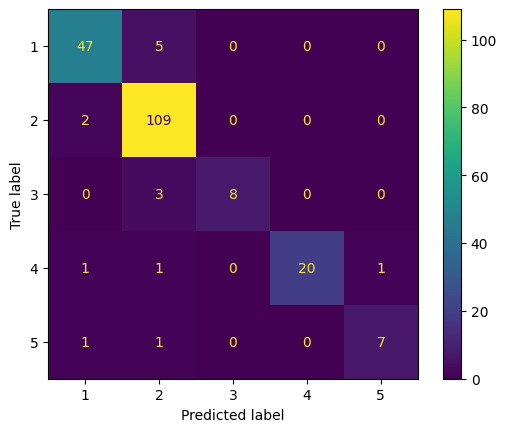

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=lr_object.predict(X_test))
plt.show()

In [ ]:
print(classification_report(y_test, lr_object.predict(X_test)))

              precision    recall  f1-score   support

           1       0.92      0.90      0.91        52
           2       0.92      0.98      0.95       111
           3       1.00      0.73      0.84        11
           4       1.00      0.87      0.93        23
           5       0.88      0.78      0.82         9

    accuracy                           0.93       206
   macro avg       0.94      0.85      0.89       206
weighted avg       0.93      0.93      0.93       206



In [ ]:
print(classification_report(y_train, lr_object.predict(X_train)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       207
           2       1.00      1.00      1.00       443
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        93
           5       1.00      1.00      1.00        35

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823



# Правка

То, что ты хотела сделать, кажется,  лучше всего сделать вот так

In [47]:
old = pd.read_csv("df_merge_labelled.csv", index_col='id')

In [48]:
cols_drop=['regNumber', 'invNumber', 'gikNumber', 'type', 'nativeId', 'description', 'image']

old.drop(columns=cols_drop + ['comment'], inplace=True)

In [49]:
old = old[old.connectedness != 0]
old

,name,author,technologies,connectedness
id,,,,
5c3e1b7293fa687ca4c17408,Картина. Вид на Адмиралтейство.,неизвестный художник по рис. М.И. Махаева,"живопись, холст, масло",2
5c3e09b693fa687ca4c0d1af,Проспект по реке Фонтанке от Грота и Запасного...,"Валериани, Джузеппе (1708 - 1762), по рисунку ...","масло, холст",2
6011e347b27c324dbb8a3d23,Вид Невской перспективы у Аничкова дворца.,"Неизвестный художник, варьированная копия гра...",холст. масло,2
6011e347b27c324dbb8a3d39,Здание Двенадцати коллегий на Васильевском ост...,"Неизвестный художник, варьированная копия с гр...",холст. масло,2
6227c720cff1801b8a9a2085,Летний дворец,Неизвестный художник ХVIII века (круга Махаева),"холст, масло",3
...,...,...,...,...
5c3e174193fa687ca48548e6,Фотография. Фрагмент гравюры «Вид города Свияж...,NaN,"фотобумага, картон, фотопечать",5
5c3e174193fa687ca48548e8,Фотография. Фрагмент гравюры «Вид города Свияж...,NaN,"фотобумага, картон, фотопечать",5
5c3e174193fa687ca4854957,Фотография. Гравюра «Вид города Свияжска при в...,NaN,"фотобумага, картон, фотопечать",5


In [50]:
# на самом деле, строка с именами колонок почему-то была в самом низу
new = pd.read_csv("df_merge_labelled_enriched - df_merge_labelled_enriched.csv", index_col='id')

In [51]:
new.connectedness = new.connectedness.astype(int)
new.drop(columns=cols_drop, inplace=True)

# из старых данных Роман удалял connectedness = 0
new = new[new.connectedness != 0]
new

,name,author,statusId,date_created,typology,technologies,connectedness
id,,,,,,,
5c3e1a1e93fa687ca4aeef9a,«Вид города Томска».1770. Из серии «Собрание Р...,Махаев Михайла Иванович (1716-1770),6,1770г.,графика,"бумага «верже» с водяным знаком, резец",1
5c3e096b93fa687ca4bd1cca,Гравюра. Охотничий павильон в Зверинце в Царск...,Махаев М. И.,6,сер.18 в.,графика,"бумага, гравюра резцом",1
5c3e0a1393fa687ca4c62ddb,Гравюра. Проспект вверх по Неве реке к востоку...,"Махаев Михаил Иванович , Еляков Иван Петрович ...",6,1750-1753,графика,"резцовая гравюра, офорт, бумага",1
5c3e0a1393fa687ca4c62de9,"Гравюра. Проспект старого Зимнего дворца, с ка...","Махаев Михаил Иванович , Виноградов Ефим Григо...",6,1750-1760,графика,"гравюра резцом, бумага",1
5c3e0a1393fa687ca4c62df0,Гравюра. Проспект Адмиралтейства и около лежащ...,Махаев Михаил Иванович,6,1750-1760,графика,"гравюра, бумага",1
...,...,...,...,...,...,...,...
5c3e174193fa687ca48548e6,Фотография. Фрагмент гравюры «Вид города Свияж...,NaN,6,XX век,фотографии и негативы,"фотобумага, картон, фотопечать",5
5c3e174193fa687ca48548e8,Фотография. Фрагмент гравюры «Вид города Свияж...,NaN,6,XX век,фотографии и негативы,"фотобумага, картон, фотопечать",5
5c3e174193fa687ca4854957,Фотография. Гравюра «Вид города Свияжска при в...,NaN,6,XX век,фотографии и негативы,"фотобумага, картон, фотопечать",5


In [53]:
# удалим старые объекты из новых данных

indexes_old = old.index
short_new = new.drop(old.index)

short_new

,name,author,statusId,date_created,typology,technologies,connectedness
id,,,,,,,
608f1729172e287c2d0f325a,План Петербурга 1753 г.,"Трускот И., составитель. ,Гравировано под набл...",6,1753 г.,графика,бумага. гравюра,1
60e0d3bc96dc325ffaf5aabd,План Москвы и окрестностей,"Автор чертежа: Трускотт, Иван Фомич , Автор ри...",6,1763 г.,графика,"бумага, гравюра резцом",1
61844ca3e07053748e2f64fc,План 13 частей г. Петербурга с аксонометрическ...,"Соколов И.А. , Махаев М.И. ,Трускот И.",6,1753 г.,графика,"бумага верже, гравюра резцовая",1
61844ca3e07053748e2f651a,План 13 частей г. Петербурга с аксонометрическ...,"Трускот И. , Махаев М.И. , Соколов И.А.",6,1753 г.,графика,"бумага верже, гравюра резцовая",1
61844ca3e07053748e2f651f,План 13 частей г. Петербурга с аксонометрическ...,"Соколов И.А. ,Трускот И. , Махаев М.И.",6,1753 г.,графика,"гравюра резцовая, бумага верже",1
...,...,...,...,...,...,...,...
5c3e124593fa687ca43c660d,Отпечаток фотомеханический. Виды половины XVII...,Найденов Николай Александрович (Составитель),6,1886г.,фотографии и негативы,"фототипия, бумага",5
5c3e124593fa687ca43c660f,Отпечаток фотомеханический. Виды 1775 г.: \r\n...,Найденов Николай Александрович (Составитель),6,1886г.,фотографии и негативы,"фототипия, бумага",5
5c3e124593fa687ca43c6611,Отпечаток фотомеханический. Виды половины XVII...,Найденов Николай Александрович (Составитель),6,1886г.,фотографии и негативы,"фототипия, бумага",5


,name,author,statusId,date_created,typology,technologies,connectedness
id,,,,,,,
608f1729172e287c2d0f325a,План Петербурга 1753 г.,"Трускот И., составитель. ,Гравировано под набл...",6,1753 г.,графика,бумага. гравюра,1
60e0d3bc96dc325ffaf5aabd,План Москвы и окрестностей,"Автор чертежа: Трускотт, Иван Фомич , Автор ри...",6,1763 г.,графика,"бумага, гравюра резцом",1
61844ca3e07053748e2f64fc,План 13 частей г. Петербурга с аксонометрическ...,"Соколов И.А. , Махаев М.И. ,Трускот И.",6,1753 г.,графика,"бумага верже, гравюра резцовая",1
61844ca3e07053748e2f651a,План 13 частей г. Петербурга с аксонометрическ...,"Трускот И. , Махаев М.И. , Соколов И.А.",6,1753 г.,графика,"бумага верже, гравюра резцовая",1
61844ca3e07053748e2f651f,План 13 частей г. Петербурга с аксонометрическ...,"Соколов И.А. ,Трускот И. , Махаев М.И.",6,1753 г.,графика,"гравюра резцовая, бумага верже",1
...,...,...,...,...,...,...,...
5c3e124593fa687ca43c660d,Отпечаток фотомеханический. Виды половины XVII...,Найденов Николай Александрович (Составитель),6,1886г.,фотографии и негативы,"фототипия, бумага",5
5c3e124593fa687ca43c660f,Отпечаток фотомеханический. Виды 1775 г.: \r\n...,Найденов Николай Александрович (Составитель),6,1886г.,фотографии и негативы,"фототипия, бумага",5
5c3e124593fa687ca43c6611,Отпечаток фотомеханический. Виды половины XVII...,Найденов Николай Александрович (Составитель),6,1886г.,фотографии и негативы,"фототипия, бумага",5
